In [2]:
import numpy as np
import time
import scipy as sp
import matplotlib.pyplot as plt
import cmath as cm
%matplotlib inline

ti=time.clock()

# Transmission matrices

In [1]:
#empty space
def Mfree (k,l): 
    Mfree = np.matrix([[np.exp(1j*k*l), 0], [0, np.exp(-1j*k*l)]])
    return Mfree

#boundary
def Mtrans (k1,ϵ1,k2,ϵ2): 
    χ = (k1*ϵ2)/(k2*ϵ1)
    Mtrans = np.matrix([[(1+χ)/2, (1-χ)/2], [(1-χ)/2, (1+χ)/2]])
    return Mtrans

#one layer
def M1 (k1,l1,ϵ1,k2,l2,ϵ2):
    M1 = Mfree(k1,l1)*Mtrans(k2,ϵ2,k1,ϵ1)*Mfree(k2,l2)*Mtrans(k1,ϵ1,k2,ϵ2)
    return M1

#entry from vacuum
def Min (k0,k1,l1):
    Min = Mfree(k1,l1)*Mtrans(k0,k1)
    return Min

#exit to vacuum
def Mout (k2,l2,k0):
    Mout = Mtrans(k2,k0)*Mfree(k2,l2)*Mtrans(k1,k2)
    return Mout

## Task 1: Frequency spectrum of  single photonic crystal

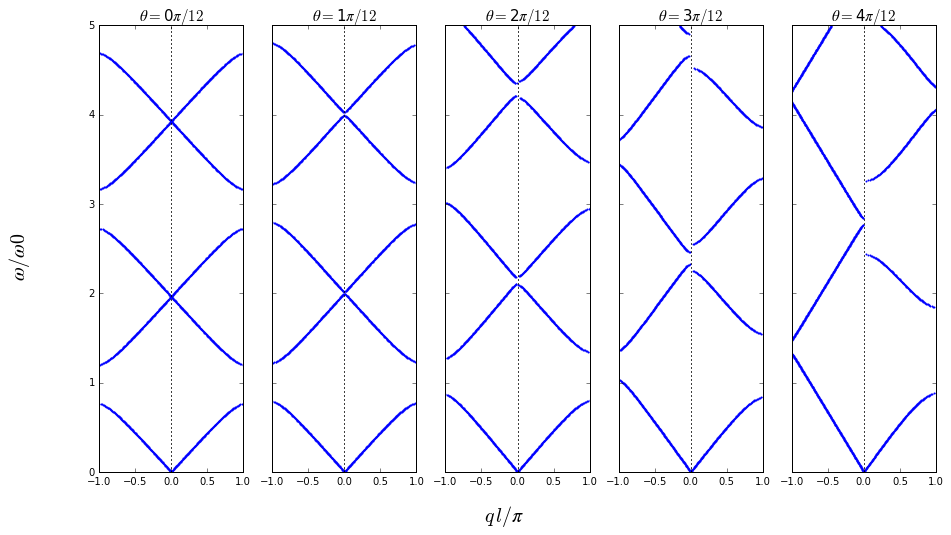

In [3]:
ϵ1 = 1
ϵ2 = 4
l1 = 2
l2 = 1

N=1000
k=0.8   #scale ω0/c

q = np.zeros((N,1))
ω = np.zeros((N,1))  # dimensionless

f, axarr = plt.subplots(1, 5, sharey=True, figsize=(15,8)) 
f.text(0.5, 0.04, '$q\,l/π$', ha='center', fontsize=20)
f.text(0.04, 0.5, '$ω/ω0$', va='center', rotation='vertical', fontsize=20)

for m in range (0,2):      
    for j in range (0,5): 
        θ = j*np.pi/12
        for i in range (1,N):
                ω[i,0] = 5*i/N 
                k0 = k*ω[i,0]
                k1 = k0*np.sqrt(ϵ1 - np.sin(θ)**2)
                k2 = k0*np.sqrt(ϵ2 - np.sin(θ)**2)
                χ = k1/k2*((ϵ2/ϵ1)**m) 
                Φ1 = k1*l1
                Φ2 = k2*l2

                x = np.cos(Φ1)*np.cos(Φ2) - (χ + 1/χ)*np.sin(Φ1)*np.sin(Φ2)/2
                if np.abs(x) <=1: q[i,0] = (-1)**m*np.arccos(x)/(l1+l2)    #TE on right, TM on left
                else:
                    ω[i,0] = ω[0,0]
                    q[i,0] = 0          
                
        axarr[j].scatter(q, ω, s=1, color='blue')
        axarr[j].axis([-1,1,0,5])
        axarr[j].set_title('$θ=$'+str(j)+'$π/12$', fontsize = 15)
        axarr[j].plot((0, 0), (0, 5), color='black', linestyle='dotted')

## Task 2: periodical system of N photonic crystals

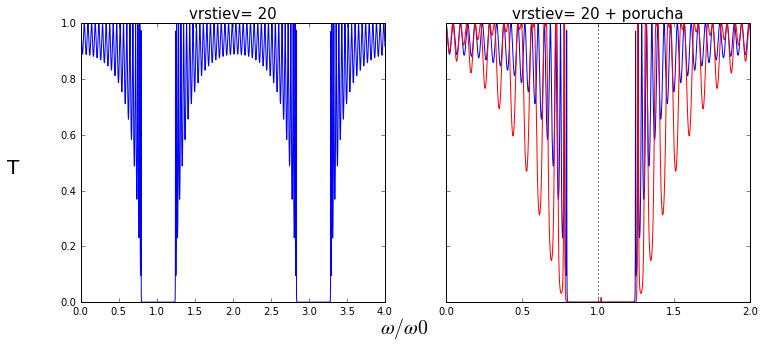

In [18]:
ϵ1 = 1
ϵ2 = 4
l1 = 2
l2 = 1

n=20         #layers
N=5000
k = 0.77

ω = np.zeros((N,1))
Mn = np.zeros((2,2))    #matrix for n layers
Mnp = np.zeros ((2,2))  #with defect
Tn = np.zeros((N,1))    #transmission coeff
Tnp = np.zeros((N,1))   #with defect

f, axarr = plt.subplots(1, 2, sharey=True, figsize=(12,5))
f.text(0.5, 0.04, '$ω/ω0$', ha='center', fontsize=20)
f.text(0.04, 0.5, 'T', va='center', fontsize=20)

for i in range (1,N):
    ω[i,0] = 4*i/N 
    k0 = ω[i,0]*k
    k1 = k0*np.sqrt(ϵ1)
    k2 = k0*np.sqrt(ϵ2)
    Mn = M1(k1,l1,ϵ1,k2,l2,ϵ2)**n 
    Mnp = (M1(k1,l1,ϵ1,k2,l2,ϵ2)**(n//2))*Mfree(k1,l1)*(M1(k1,l1,ϵ1,k2,l2,ϵ2)**(n//2))
    
    Tn[i,0] = 1/(np.absolute(Mn[0,0]))**2 
    Tnp[i,0] = 1/(np.absolute(Mnp[0,0]))**2
    
    
axarr[0].set_title('layers= '+str(n), fontsize = 15)
axarr[0].plot(ω, Tn, color='blue')
axarr[0].axis([0,4,0,1])

axarr[1].set_title('layers= '+str(n)+' + deffect', fontsize = 15)
axarr[1].plot(ω, Tn, color='blue')
axarr[1].plot(ω, Tnp, color='red')
axarr[1].axis([0,2,0,1])
axarr[1].plot((1, 1), (0, 1), color='black', linestyle='dotted')

# Task 3: Metal layer

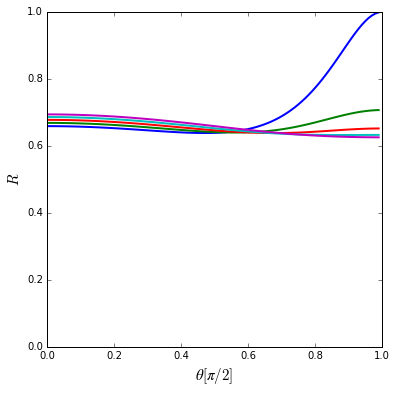

In [73]:
ϵd = 2
ϵkov = -10.66 + 1j*1.37
λ = 2*np.pi   #scaled by λ0/2π = 632.8*(10**(-9))/2π
k0 = 2*np.pi/λ
L= λ/20

N=100

M = np.zeros((2,2))    #resultant matrix
θ = np.zeros((N,1))    #angle
R = np.zeros((N,1))    #reflex coeff

plt.figure(figsize=(6,6))
plt.axis([0,1,0,1])
plt.xlabel('$θ[π/2]$', fontsize = 15)
plt.ylabel('$R$', fontsize = 15) 

for j in range (0,5):
    ϵ3 = 1 + 0.2*j
    for i in range (0,N):
        θ[i,0] = i*np.pi/(2*N)
        kd = k0*cm.sqrt(ϵd - np.sin(θ[i,0])**2)
        kkov = k0*cm.sqrt(ϵkov - np.sin(θ[i,0])**2)
        #kkovreal=np.absolute(kkov)
        k3 = k0*cm.sqrt(ϵ3 - np.sin(θ[i,0])**2) 

        M = Mtrans(kkov,ϵkov,k3,ϵ3)*Mfree(kkov,L)*Mtrans(kd,ϵd,kkov,ϵkov)
        R[i,0] = 1-1/(np.absolute(M[0,0]))**2

    plt.plot(2*θ/np.pi, R, linewidth = 2)
#print(np.sqrt(ϵkov))
#print(Mtrans(kkov,ϵkov,kd,ϵd)*Mtrans(kd,ϵd,kkov,ϵkov))
    